# Quarta esperienza

## Import dipendenze

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## Misura dello slew rate

In [25]:
V_i = 1.25
nu = 10000
Dx = np.array([3.58,3.61,3.66,3.68]) #microsecondi
Trise_10_90 =  1/Dx.mean()

In [26]:
Trise_10_90

0.27529249827942187

## Misura del GxBW

In [27]:
# Frequenze suggerite:
print(np.logspace(1,2.8, 4, base=10).round(-1))
print(np.logspace(2.8,5.5, 20,base=10).round(-1)[1:])
print(np.logspace(5.5, 6, 3,).round(-4)[1:])


[ 10.  40. 160. 630.]
[   880.   1210.   1680.   2340.   3240.   4490.   6230.   8650.  11990.
  16640.  23080.  32010.  44400.  61580.  85420. 118490. 164360. 227980.
 316230.]
[ 560000. 1000000.]


In [28]:
R = 1000
R_primo = np.array([4700, 33000, 100000, 220000])

In [29]:
nu=np.array([9.01,40.64,160.5,630,888,1210,1688,2300,3240,4470,6350,8650,12300,16560,22950,31900,44200,61501,85500,118900,163900,227000,318900,556000,1000000])

V_in_1 = np.array([261,261,263,262,261,263,262,263,265,263,75.2,75.2,75.2,75.2,75.2,75.2,74.8,74.8,75.4,75.6,76.8,77.2,77.2,77.2,77.2])*1e-3 #circa 1V
V_out_1 =np.array([1.2, 1.27,1.21,1.29,1.31,1.21,1.21,1.21,1.21,1.21,0.358,0.350,0.350,0.346,0.344,0.338,0.330,0.318,0.292,0.261,0.221,0.179,0.133,0.0776,0.0422])

V_in_2 = np.array([261,261,263,263,262,262,263,263,264,263,75,75.2,75.2,75.4,75.4,76,76.2,76.8,77,77.2,78,77.6,77.6,77.6,77.2])*1e-3 #circa 0.1V
V_out_2 =np.array([3.84,3.82,3.8,3.8,3.86,3.8,3.8,3.8,3.79,3.78,1.09,1.07,1.05,1.03,0.975,0.895,0.775,0.647,0.509,0.380,0.287,0.211,0.148,0.084,0.0454])

V_in_3 = np.array([261,262,263,262,263,262,262,264,264,264,75.4,76,76.4,77,77.4,77.8,77.6,77.6,77.8,77.8,77.6,77.6,77.2,77.2,77.2])*1e-3 #circa 0.05V
V_out_3 =np.array([12.1,12.1,12.1,12.1,12.1,12.1,12,12,11.7,11.4,3.2,3.03,2.69,2.33,1.91,1.42,1.07,0.780,0.575,0.420,0.302,0.219,0.154,0.088,0.0454])

V_in_4 = np.array([262,262,262,263,263,263,264,265,267,270,76.4,77.4,77.8,77.8,78.2,77.8,77.8,78,78,77.8,78,77.6,77.6,77.6,77.2])*1e-3 #Circa 0.03V
V_out_4 =np.array([26,26,26.2,25.9,25.9,25.6,25.3,24.5,22.7,20.6,5.51,4.7,3.7,2.83,2.14,1.52,1.12,0.805,0.583,0.424,0.304,0.223,0.155,0.088,0.0452])

print(len(nu))
print(len(V_out_1))
print(len(V_in_1))
print(len(V_out_2))
print(len(V_in_2))
print(len(V_out_3))
print(len(V_in_3))
print(len(V_out_4))
print(len(V_in_4))


25
25
25
25
25
25
25
25
25


In [36]:
A_1, A_2, A_3, A_4 = V_out_1/V_in_1, V_out_2/V_in_2, V_out_3/V_in_3, V_out_4/V_in_4

G_1, G_2, G_3, G_4 = 20*np.log10(A_1), 20*np.log10(A_2), 20*np.log10(A_3), 20*np.log10(A_4)

In [31]:
G_BW_1

array([ 4.38953927,  7.82900842, 10.14686234, 13.78301263, 14.79854784,
       14.18315703, 14.90504067, 15.46650449, 16.02928099, 16.79419051,
       18.10363023, 18.32387816, 19.03546262, 19.41216589, 19.94826124,
       20.24310174, 20.49451001, 20.3591515 , 19.09992182, 17.52146116,
       15.00549412, 12.41876462,  9.4816846 ,  5.77484202,  3.27979275])

In [32]:
sigmaV = lambda a: a*0.03
sigmaNu = lambda a: a*0.03
sigmaG = np.sqrt(2)*(3/5)/np.log(10)

In [45]:
def retta(x,m,c):
    return m*x+c

In [73]:
def nu_c_Finder(popt, G):
    return (G[0:5].mean()-3-popt[1])/popt[0]

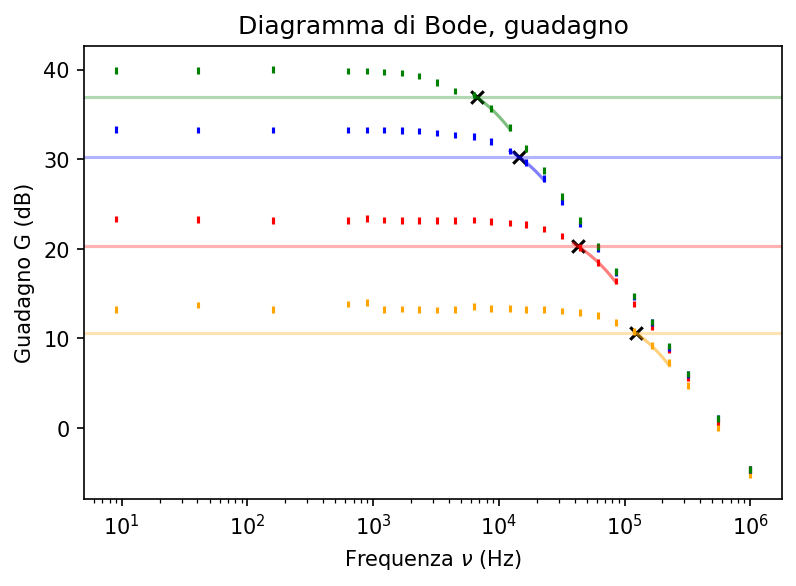

In [81]:
plt.errorbar(nu, G_1, sigmaG, color="orange", linestyle="")
plt.axhline(G_1[0:5].mean()-3, color="orange", alpha=0.3)
a_1, b_1 = 19, 21
popt_1, cov_1 = curve_fit(retta, nu[a_1:b_1], G_1[a_1:b_1], absolute_sigma=sigmaG)
x_1 = np.linspace(nu[a_1], nu[b_1], 50)
plt.plot(x_1, popt_1[0]*x_1 + popt_1[1], color="orange", alpha=0.5)
plt.scatter(nu_c_Finder(popt_1, G_1), G_1[0:5].mean()-3, marker="x", color="black")

plt.errorbar(nu, G_2, sigmaG, color="red", linestyle="")
plt.axhline(G_2[0:5].mean()-3, color="red", alpha=0.3)
a_2, b_2 = 16, 18
popt_2, cov_2 = curve_fit(retta, nu[a_2:b_2], G_2[a_2:b_2], absolute_sigma=sigmaG)
x_2 = np.linspace(nu[a_2]-5000, nu[b_2], 50)
plt.plot(x_2, popt_2[0]*x_2 + popt_2[1], color="red", alpha=0.5)
plt.scatter(nu_c_Finder(popt_2, G_2), G_2[0:5].mean()-3, marker="x", color="black")

plt.errorbar(nu, G_3, sigmaG, color="blue", linestyle="")
plt.axhline(G_3[0:5].mean()-3, color="blue", alpha=0.3)
a_3, b_3 = 12, 14
popt_3, cov_3 = curve_fit(retta, nu[a_3:b_3], G_3[a_3:b_3], absolute_sigma=sigmaG)
x_3 = np.linspace(nu[a_3], nu[b_3], 50)
plt.plot(x_3, popt_3[0]*x_3 + popt_3[1], color="blue", alpha=0.5)
plt.scatter(nu_c_Finder(popt_3, G_3), G_3[0:5].mean()-3, marker="x", color="black")

plt.errorbar(nu, G_4, sigmaG, color="green", linestyle="")
plt.axhline(G_4[0:5].mean()-3, color="green", alpha=0.3)
a_4, b_4 = 10, 12
popt_4, cov_4 = curve_fit(retta, nu[a_4:b_4], G_4[a_4:b_4], absolute_sigma=sigmaG)
x_4 = np.linspace(nu[a_4], nu[b_4], 50)
plt.plot(x_4, popt_4[0]*x_4 + popt_4[1], color="green", alpha=0.5)
plt.scatter(nu_c_Finder(popt_4, G_4), G_4[0:5].mean()-3, marker="x", color="black")


plt.xscale("log")
plt.title("Diagramma di Bode, guadagno")
plt.xlabel("Frequenza $\\nu$ (Hz)")
plt.ylabel("Guadagno G (dB)")

plt.savefig("GxBW.png", dpi=300)
#plt.axhline(0)
#plt.axvline(600000)

In [90]:
GxBW_1 = nu_c_Finder(popt_1, G_1)*A_1[0:5].mean()
GxBW_2 = nu_c_Finder(popt_2, G_2)*A_2[0:5].mean()
GxBW_3 = nu_c_Finder(popt_3, G_3)*A_3[0:5].mean()
GxBW_4 = nu_c_Finder(popt_4, G_4)*A_4[0:5].mean()

In [92]:
np.array([GxBW_1,GxBW_2,GxBW_3,GxBW_4]).mean()

636187.1233062594

In [71]:
nu_c_Finder(popt_1,G_1)

125678.4863306483

In [34]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st